In [1]:
import math as m
from matplotlib import pyplot as plt
import numpy as np
import Point as Po
import Linea as L

In [32]:
EPS = 0.00001
class Poligono:
    def __init__(self, k, ver):
        self.vertices = ver
        self.n = k
        self.caras = [L.Linea.obtenLinea(self.vertices[i],self.vertices[i+1]) for i in range(0, self.n)]
    
    def VisPol(self):
        for i in range(0, self.n ):
            xmin = min(self.vertices[i].x, self.vertices[i+1].x)
            xmax = max(self.vertices[i].x, self.vertices[i+1].x)
            X = np.arange(xmin, xmax, 0.01)
            plt.plot(X, self.caras[i].eval(X), color="black")
    
    def dentro(self, pt):
        if self.n == 0:
            return False
        for i in range(0, self.n):
            if pt == self.vertices[i]:
                return True
            if Po.Point.collinear(self.vertices[i], self.vertices[i + 1], pt):
                u = self.vertices[i]
                w = self.vertices[i + 1]
                if pt.x >= min(u.x,w.x) and pt.x <= max(u.x, w.x):
                    if pt.y >= min(u.y, w.y) and pt.y <= min(u.y, w.y):
                        return True
        suma = 0
        for i in range(0, self.n):
            if(Po.Vec.ccw(pt, self.vertices[i], self.vertices[i+1])):
                suma = suma + Po.Vec.angle(self.vertices[i], pt, self.vertices[i+1])
            else:
                suma = suma - Po.Vec.angle(self.vertices[i], pt, self.vertices[i+1])
        return abs(suma - 2*m.pi) < EPS
    
    #finds de convex combination of a point inside of a polygon
    def combinacion(self, x):
        q = L.Linea.obtenLinea(self.vertices[0], x)
        x1 = 0
        x2 = 0
        z = Po.Point(0,0)
        for i in range(0,self.n + 1):
            z = L.Linea.interseca(q,self.caras[i])
            if(z == self.vertices[0]):
                continue
            if(self.dentro(z)):
                if(z == self.vertices[i]):
                    x1 = i
                    x2 = -1
                elif z == self.vertices[i+1]:
                    x1 = i + 1
                    x2 = -1
                else:
                    x1 = i
                    x2 = i + 1
                break
        a = Po.Point(0,0)
        b = Po.Point(0,0)
        lambd = 0
        if x2 != -1:
            lambd = 0
            a = self.vertices[x1]
            b = self.vertices[x2]
            if(a.x != b.x):
                lambd = (z.x - b.x) / (a.x - b.x)
            else:
                lambd = (z.y - b.y) / (a.y - b.y)
        else:
            lambd = 1
            x2 = x1
        gamma = 0
        a = self.vertices[0]
        b = z
        if(a.x != b.x):
            gamma =(x.x - b.x) / (a.x - b.x)
        else:
            gamma = (x.y - b.y) / (a.y - b.y)
        
        a1 = gamma
        a2 = (1-gamma)*lambd
        a3 = (1-gamma) *(1-lambd)
        return a1,a2,a3,x1,x2
            
    def show(self,x):
        a1,a2,a3,x1,x2 = self.combinacion(x)
        print("({},{}) = ".format(x.x,x.y),end = " ")
        print("{}({},{}) + ".format(a1,self.vertices[0].x,self.vertices[0].y), end=" ")
        print("{}({},{}) + ".format(a2,self.vertices[x1].x,self.vertices[x1].y), end= " ")
        print("{}({},{})".format(a3,self.vertices[x2].x, self.vertices[x2].y))
        self.VisPol()
        plt.plot(x.x,x.y,'ro')
                

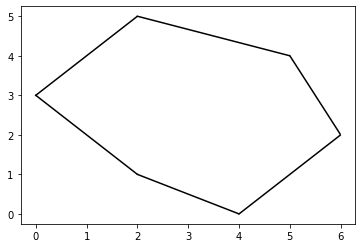

In [33]:
k = 6
ver = [Po.Point(0,3), Po.Point(2,5), Po.Point(5,4), Po.Point(6,2), Po.Point(4,0), Po.Point(2,1),Po.Point(0,3)]
P = Poligono(k,ver)
P.VisPol()

(3,2.5) =  0.5(0,3) +  0.5(6,2) +  0.0(6,2)


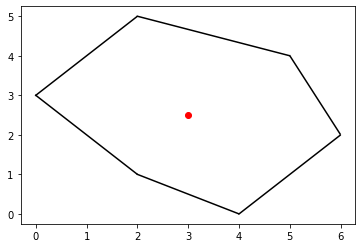

In [34]:
q = Po.Point(3,2.5)
P.show(q)